# 수요 예측
#### 앞서 그룹화된 출/퇴근 시간대의 주요 대여소들을 추려 특정 대여소의 수요를 예측한다.
## train data

In [0]:
#날씨 데이터 로드
climate = pd.read_csv('climate.csv')
dust = pd.read_csv('dust.csv')

In [0]:
climate = climate[['date', 'temp', 'rain']]
dust = dust[['date','PM10','PM25']]

In [0]:
climate_dust = pd.merge(climate, dust, left_on = 'date', right_on = 'date')

climate_dust['date'] = pd.to_datetime(climate_dust['date'])

In [0]:
print(len(climate), len(dust), len(climate_dust))

2190 2190 2190


In [0]:
climate_dust.head(6).append(climate_dust.tail(6))

,date,temp,rain,PM10,PM25
0,2017-10-01 07:00:00,17.3,0.0,36,25
1,2017-10-01 08:00:00,17.6,0.0,36,25
2,2017-10-01 09:00:00,19.3,0.0,33,22
3,2017-10-01 17:00:00,18.8,0.0,27,17
4,2017-10-01 18:00:00,18.5,0.0,26,16
5,2017-10-01 19:00:00,18.3,0.0,24,16
2184,2018-09-30 07:00:00,15.1,0.0,14,8
2185,2018-09-30 08:00:00,16.2,0.0,17,9
2186,2018-09-30 09:00:00,18.5,0.0,13,7
2187,2018-09-30 17:00:00,20.4,0.0,18,7


In [0]:
#출근과 퇴근으로 나눠줌
climate_cg = climate_dust[(climate_dust['date'].dt.hour >= 7 ) & (climate_dust['date'].dt.hour<10)] 
climate_tg = climate_dust[(climate_dust['date'].dt.hour >= 17 ) & (climate_dust['date'].dt.hour<20)] 
climate_cg.head(6)

,date,temp,rain,PM10,PM25
0,2017-10-01 07:00:00,17.3,0.0,36,25
1,2017-10-01 08:00:00,17.6,0.0,36,25
2,2017-10-01 09:00:00,19.3,0.0,33,22
6,2017-10-02 07:00:00,16.9,0.0,12,9
7,2017-10-02 08:00:00,17.8,0.0,15,10
8,2017-10-02 09:00:00,20.5,0.0,12,6


In [0]:
#시간대의 평균을 구함
climate_cg_avg = climate_cg.pivot_table(index = climate_cg['date'].dt.date, aggfunc={'temp' : 'mean', 'rain' : 'mean', 'PM10' : 'mean', 'PM25' : 'mean'})
climate_tg_avg = climate_tg.pivot_table(index = climate_tg['date'].dt.date, aggfunc={'temp' : 'mean', 'rain' : 'mean', 'PM10' : 'mean', 'PM25' : 'mean'})

climate_cg_avg.head(7)

,PM10,PM25,rain,temp
date,,,,
2017-10-01,35.000000,24.000000,0.0,18.066667
2017-10-02,13.000000,8.333333,0.0,18.400000
2017-10-03,27.000000,7.333333,0.0,14.500000
2017-10-04,17.333333,7.333333,0.0,12.566667
2017-10-05,11.000000,5.333333,0.0,15.500000
2017-10-06,14.000000,7.333333,0.0,17.933333
2017-10-07,6.333333,3.000000,0.0,17.766667


In [0]:
df_pred_cg= df2[(df2['departure'].dt.hour >= 7 ) & (df2['departure'].dt.hour<10)] 
df_pred_cg.head()

,DepartureID,ArrivalID,departure,arrival,depweekday,arrweekday,depweekend,arrweekend,depholiday,arrholiday
3513,1323,312,2017-10-01 07:00:26,2017-10-01 07:43:37,6,6,True,True,False,False
3514,165,195,2017-10-01 07:01:16,2017-10-01 07:08:06,6,6,True,True,False,False
3515,1440,1440,2017-10-01 07:01:21,2017-10-01 07:57:11,6,6,True,True,False,False
3516,247,236,2017-10-01 07:01:34,2017-10-01 07:12:34,6,6,True,True,False,False
3517,1628,1438,2017-10-01 07:01:42,2017-10-01 07:48:46,6,6,True,True,False,False


In [0]:
df_pred_tg= df2[(df2['departure'].dt.hour >= 17 ) & (df2['departure'].dt.hour<20)] 
df_pred_tg.head()

,DepartureID,ArrivalID,departure,arrival,depweekday,arrweekday,depweekend,arrweekend,depholiday,arrholiday
7396,1121,1121,2017-10-01 17:00:08,2017-10-01 18:33:32,6,6,True,True,False,False
7397,630,559,2017-10-01 17:00:08,2017-10-01 17:08:00,6,6,True,True,False,False
7398,1414,1414,2017-10-01 17:00:09,2017-10-01 18:48:12,6,6,True,True,False,False
7399,335,383,2017-10-01 17:00:10,2017-10-01 17:30:26,6,6,True,True,False,False
7400,1913,1911,2017-10-01 17:00:18,2017-10-01 17:11:42,6,6,True,True,False,False


### 대여가 제일 많은 113번 대여소의 정보만 뽑아냅니다

In [0]:
df_pred_cg_113 = df_pred_cg[(df_pred_cg['DepartureID'] == 113)]
df_pred_cg_113_count = df_pred_cg_113['departure'].dt.date.value_counts()
df_pred_cg_113_count = pd.DataFrame({'113_dep' : df_pred_cg_113_count.sort_index(ascending=1)})
df_pred_cg_113_count.head(7)

,113_dep
2017-10-01,4
2017-10-02,7
2017-10-03,7
2017-10-04,2
2017-10-05,2
2017-10-06,7
2017-10-07,3


In [0]:
test1 = df2[(df2['DepartureID'] == 113)]
testdate = test1.pivot_table(index = test1['departure'].dt.date, aggfunc = {'depweekday' : 'mean', 'depweekend' : 'mean', 'depholiday' : 'mean'})
testdate.head(7)

,depholiday,depweekday,depweekend
departure,,,
2017-10-01,False,6,True
2017-10-02,True,0,False
2017-10-03,True,1,False
2017-10-04,True,2,False
2017-10-05,True,3,False
2017-10-06,True,4,False
2017-10-07,False,5,True


In [0]:
m113_1 = pd.merge(testdate, df_pred_cg_113_count, left_index = True, right_index= True, how = 'outer')
m113_1.isna().sum() # 빌려지지 않은 개수 세기
m113_1 = m113_1.fillna(0)

In [0]:
mg_113 = pd.merge(m113_1, climate_cg_avg, left_index = True, right_index= True, how = 'inner')

In [0]:
mg_113.head()

,depholiday,depweekday,depweekend,113_dep,PM10,PM25,rain,temp
2017-10-01,False,6,True,4.0,35.000000,24.000000,0.0,18.066667
2017-10-02,True,0,False,7.0,13.000000,8.333333,0.0,18.400000
2017-10-03,True,1,False,7.0,27.000000,7.333333,0.0,14.500000
2017-10-04,True,2,False,2.0,17.333333,7.333333,0.0,12.566667
2017-10-05,True,3,False,2.0,11.000000,5.333333,0.0,15.500000


In [0]:
# 요일을 one-hot encoding 
ohe = pd.get_dummies(mg_113.depweekday)
ohe.columns = ['mon','tue','wed','thu','fri','sat','sun']
ohe.head()

,mon,tue,wed,thu,fri,sat,sun
2017-10-01,0,0,0,0,0,0,1
2017-10-02,1,0,0,0,0,0,0
2017-10-03,0,1,0,0,0,0,0
2017-10-04,0,0,1,0,0,0,0
2017-10-05,0,0,0,1,0,0,0


In [0]:
mg_113_1 = pd.merge(mg_113, ohe,  left_index = True, right_index= True, how = 'left')
mg_113_1 = mg_113_1.drop('depweekday', axis = 1)
mg_113_1_y = mg_113_1['113_dep']
mg_113_1_x = mg_113_1.copy().drop('113_dep', axis = 1)

In [0]:
#training x data
mg_113_1_x.head()

,depholiday,depweekend,PM10,PM25,rain,temp,mon,tue,wed,thu,fri,sat,sun
2017-10-01,False,True,35.000000,24.000000,0.0,18.066667,0,0,0,0,0,0,1
2017-10-02,True,False,13.000000,8.333333,0.0,18.400000,1,0,0,0,0,0,0
2017-10-03,True,False,27.000000,7.333333,0.0,14.500000,0,1,0,0,0,0,0
2017-10-04,True,False,17.333333,7.333333,0.0,12.566667,0,0,1,0,0,0,0
2017-10-05,True,False,11.000000,5.333333,0.0,15.500000,0,0,0,1,0,0,0


In [0]:
#training y data
train_y = pd.DataFrame(mg_113_1_y)
train_y.head()


,113_dep
2017-10-01,4.0
2017-10-02,7.0
2017-10-03,7.0
2017-10-04,2.0
2017-10-05,2.0


In [0]:
#mg_113_1_x.to_csv('pred_x.csv', mode='w')
#mg_113_1_y.to_csv('pred_y.csv', mode='w')

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()
scaled_x = pd.DataFrame(scaler.fit_transform(mg_113_1_x.values))
scaled_x.columns = ['depholiday',	'depweekend',	'scaled_PM10', 'scaled_PM25','scaled_rain'	,'scaled_temp',	'mon'	,'tue'	,'wed'	,'thu'	,'fri',	'sat'	,'sun']
scaled_x = scaled_x.set_index(mg_113_1_x.index)
scaled_x.head(7)

C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,depholiday,depweekend,scaled_PM10,scaled_PM25,scaled_rain,scaled_temp,mon,tue,wed,thu,fri,sat,sun
2017-10-01,0.0,1.0,0.263456,0.269531,0.0,0.721024,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2017-10-02,1.0,0.0,0.076487,0.085938,0.0,0.727763,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-10-03,1.0,0.0,0.195467,0.074219,0.0,0.648922,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017-10-04,1.0,0.0,0.113314,0.074219,0.0,0.609838,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2017-10-05,1.0,0.0,0.059490,0.050781,0.0,0.669137,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2017-10-06,1.0,0.0,0.084986,0.074219,0.0,0.718329,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2017-10-07,0.0,1.0,0.019830,0.023438,0.0,0.714960,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### training data 종합

In [0]:
scaled_data = pd.merge(scaled_x, pd.DataFrame(mg_113_1_y), left_index=True, right_index=True)
scaled_data.head()

,depholiday,depweekend,scaled_PM10,scaled_PM25,scaled_rain,scaled_temp,mon,tue,wed,thu,fri,sat,sun,113_dep
2017-10-01,0.0,1.0,0.263456,0.269531,0.0,0.721024,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
2017-10-02,1.0,0.0,0.076487,0.085938,0.0,0.727763,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
2017-10-03,1.0,0.0,0.195467,0.074219,0.0,0.648922,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0
2017-10-04,1.0,0.0,0.113314,0.074219,0.0,0.609838,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
2017-10-05,1.0,0.0,0.059490,0.050781,0.0,0.669137,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0


## test data
### 2018.10.23 ~ 2018. 11.22 의 데이터

In [0]:
testy = pd.read_csv('test_y.csv')

In [0]:
testy = testy.set_index(['Unnamed: 0'])
testy.head()

,113_dep
Unnamed: 0,
2018-10-23,19
2018-10-24,25
2018-10-25,23
2018-10-26,6
2018-10-27,8


In [0]:
testx = pd.read_csv('test_x.csv')
testx = testx.set_index(['Unnamed: 0'])

testx.head()

,depholiday,depweekend,PM10,PM25,rain,temp,mon,tue,wed,thu,fri,sat,sun
Unnamed: 0,,,,,,,,,,,,,
2018-10-23,False,False,54.666667,39.000000,0.000000,11.033333,0,1,0,0,0,0,0
2018-10-24,False,False,37.666667,17.666667,0.000000,8.666667,0,0,1,0,0,0,0
2018-10-25,False,False,30.333333,15.333333,0.000000,8.500000,0,0,0,1,0,0,0
2018-10-26,False,False,38.666667,22.333333,0.333333,12.233333,0,0,0,0,1,0,0
2018-10-27,False,True,21.333333,5.666667,0.000000,7.766667,0,0,0,0,0,1,0


In [0]:
scaled_testx = pd.DataFrame(scaler.transform(testx.values))
scaled_testx.columns = ['depholiday',	'depweekend',	'scaled_PM10', 'scaled_PM25','scaled_rain'	,'scaled_temp',	'mon'	,'tue'	,'wed'	,'thu'	,'fri',	'sat'	,'sun']
scaled_testx = scaled_testx.set_index(testx.index)
scaled_testx.head()

,depholiday,depweekend,scaled_PM10,scaled_PM25,scaled_rain,scaled_temp,mon,tue,wed,thu,fri,sat,sun
Unnamed: 0,,,,,,,,,,,,,
2018-10-23,0.0,0.0,0.430595,0.445312,0.000000,0.578841,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2018-10-24,0.0,0.0,0.286119,0.195313,0.000000,0.530997,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2018-10-25,0.0,0.0,0.223796,0.167969,0.000000,0.527628,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2018-10-26,0.0,0.0,0.294618,0.250000,0.037736,0.603100,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2018-10-27,0.0,1.0,0.147309,0.054688,0.000000,0.512803,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### test data 종합

In [0]:
scaled_testdata = pd.merge(scaled_testx, testy, left_index=True, right_index=True)
scaled_testdata.head()

,depholiday,depweekend,scaled_PM10,scaled_PM25,scaled_rain,scaled_temp,mon,tue,wed,thu,fri,sat,sun,113_dep
Unnamed: 0,,,,,,,,,,,,,,
2018-10-23,0.0,0.0,0.430595,0.445312,0.000000,0.578841,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19
2018-10-24,0.0,0.0,0.286119,0.195313,0.000000,0.530997,0.0,0.0,1.0,0.0,0.0,0.0,0.0,25
2018-10-25,0.0,0.0,0.223796,0.167969,0.000000,0.527628,0.0,0.0,0.0,1.0,0.0,0.0,0.0,23
2018-10-26,0.0,0.0,0.294618,0.250000,0.037736,0.603100,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6
2018-10-27,0.0,1.0,0.147309,0.054688,0.000000,0.512803,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8


## 깊은 MLP (multilayerperceptron )

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Flatten, Dropout
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [0]:
#1 1차 
model = Sequential()
model.add(Dense(64, input_dim=13, activation= 'relu'))
for i in range(3):
    model.add(Dense(64, activation= 'relu'))
    #model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss='mse', metrics=['accuracy'])
early_stopping = EarlyStopping(patience= 20)
hist = model.fit(scaled_x, train_y, epochs=3000, batch_size = 10)

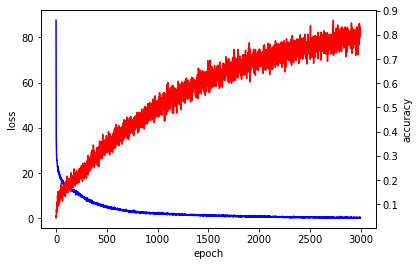

In [0]:
%matplotlib inline

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'b', label='train loss' )
acc_ax.plot(hist.history['acc'], 'r', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

plt.show()

In [0]:
y = model.predict(scaled_testx)

In [0]:
ANNplot = pd.DataFrame(scaled_testx)
ANNplot['y'] = testy.values
ANNplot['y_pred'] = y

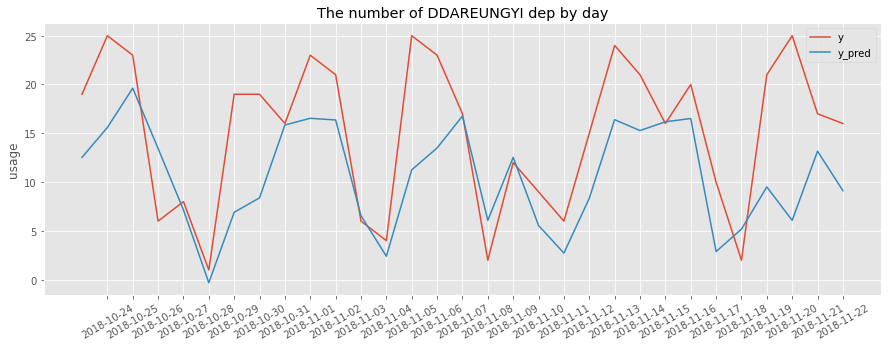

In [0]:
%matplotlib inline
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(15,5))
    
    ANNplot[['y','y_pred']].plot(ax=ax, label = ['y','y_pred'], xticks = np.arange(1,31)) #pd.date_range('2018-10-23', periods=31).to_pydatetime())
    plt.legend()
    plt.xticks(rotation=30)
    #plt.xticks(pd.date_range('2018-10-23', periods=31).to_pydatetime())
    plt.ylabel('usage')
    plt.xlabel('')
    plt.title('The number of DDAREUNGYI dep by day')  

In [0]:
loss_and_metrics = model.evaluate(scaled_testx, testy)
print('')
print('loss: ' + str(loss_and_metrics[0]))
print('accuracy: ' + str(loss_and_metrics[1]))

31/31 [==============================] - 0s 1ms/step

loss: 51.72427749633789
accuracy: 0.09677419066429138


In [0]:
poly = PolynomialFeatures(degree=2)
scaled_x_poly = poly.fit_transform(scaled_x)

In [0]:
#2 2차 poly
model = Sequential()
model.add(Dense(64, input_dim=105, activation= 'relu'))
for i in range(3):
    model.add(Dense(64, activation= 'relu'))
    #model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss='mse', metrics=['accuracy'])
early_stopping = EarlyStopping(patience= 20)
hist = model.fit(scaled_x_poly, pd.DataFrame(mg_113_1_y), epochs=3000, batch_size = 10)

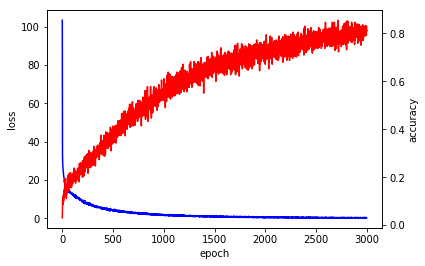

In [0]:
%matplotlib inline

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'b', label='train loss' )
acc_ax.plot(hist.history['acc'], 'r', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

plt.show()

In [0]:
scaled_testx_poly = poly.fit_transform(scaled_testx)

In [0]:
y = model.predict(scaled_testx_poly)

In [0]:
ANNplot = pd.DataFrame(scaled_testx)
ANNplot['y'] = testy.values
ANNplot['y_pred'] = y

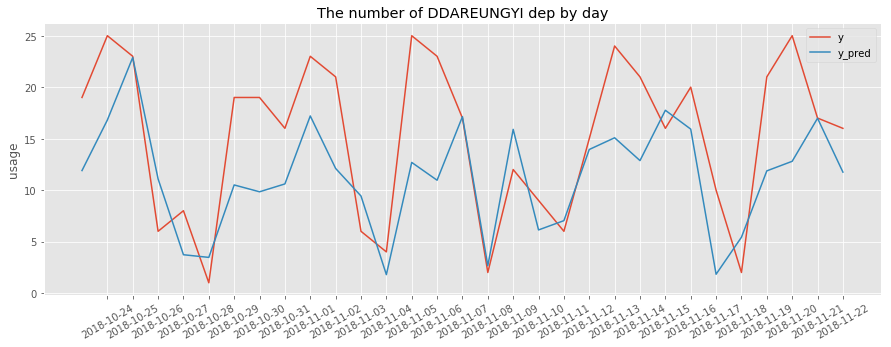

In [0]:
%matplotlib inline
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(15,5))
    
    ANNplot[['y','y_pred']].plot(ax=ax, label = ['y','y_pred'], xticks = np.arange(1,31))
    plt.legend()
    
    plt.ylabel('usage')
    plt.xlabel('')
    plt.xticks(rotation=30)
    plt.title('The number of DDAREUNGYI dep by day')  

In [0]:
loss_and_metrics = model.evaluate(scaled_testx_poly, testy)
print('')
print('loss: ' + str(loss_and_metrics[0]))
print('accuracy: ' + str(loss_and_metrics[1]))

31/31 [==============================] - 0s 1ms/step

loss: 41.90095138549805
accuracy: 0.09677419066429138


## multivariate LSTM time series data prediction

In [0]:
from numpy import array

In [0]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences.iloc[i:end_ix, :-1].as_matrix(), sequences.iloc[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [0]:
# choose a number of time steps
n_steps = 7
# convert into input/output
X, y = split_sequences(scaled_data, n_steps)

# summarize the data
#for i in range(3):
#	print(X[i], y[i])

C:\Users\lijbd\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [0]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, 13)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

hist = model.fit(X, y, epochs=500, batch_size = 10)

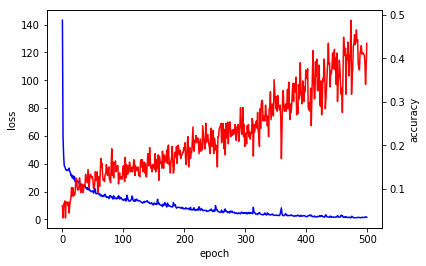

In [0]:
%matplotlib inline

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'b',label='train loss')
acc_ax.plot(hist.history['acc'], 'r', label='train acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

plt.show()

In [0]:
yhat = model.predict(X, verbose=0)

In [0]:
X_ts, y_ts = split_sequences(scaled_testdata, n_steps)


C:\Users\lijbd\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [0]:
yhat = model.predict(X_ts, verbose=0)


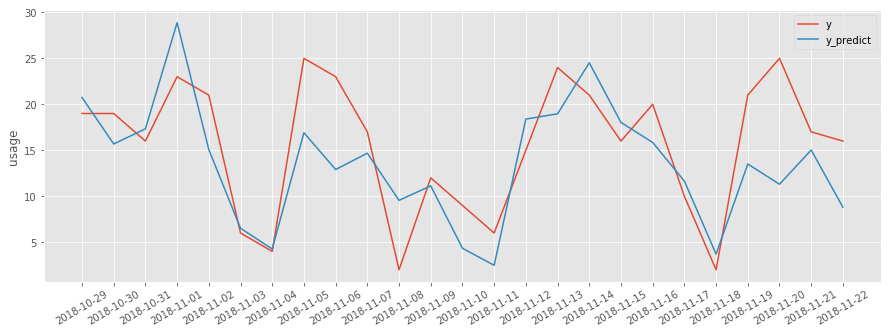

In [0]:
%matplotlib inline
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(15,5))
    
    plt.plot(testy[6:], label = 'y')
    #plt.plot(y_ts, label = 'y')
    plt.plot(yhat, label = 'y_predict')

    plt.legend()
    plt.xticks(rotation = 30)
    
    plt.ylabel('usage')
  

In [0]:
loss_and_metrics = model.evaluate(X_ts, testy[6:])
print('')
print('loss: ' + str(loss_and_metrics[0]))
print('accuracy: ' + str(loss_and_metrics[1]))

25/25 [==============================] - 0s 5ms/step

loss: 29.03619956970215
accuracy: 0.03999999910593033
